# Correlation of SAT scores in NY

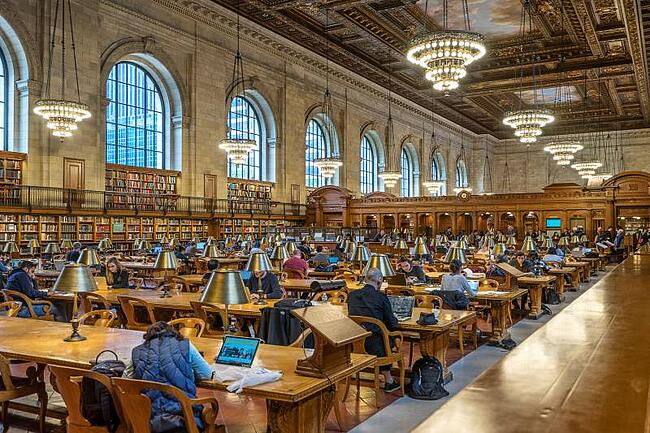

Goal of this project is to find the correlation factors between SAT score and schools in NYC area. Import the below data files to pre-processing and then merged on DBN which is a primary key for each school. Then Trying to analyze and visualize SAT score by district, race, sex, English Percentage and other factors. 

### Import Data

SAT scores by school - SAT scores for each high school in New York City

School attendance - Attendance information for each school in New York City

Class size - Information on class size for each school

AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)

Graduation outcomes - The percentage of students who graduated, and other outcome information

Demographics - Demographic information for each school

School survey - Surveys of parents, teachers, and students at each school

In [1]:
#import all the files and read the files
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

for i in data_files:
    file = pd.read_csv('./{0}'.format(i))
    key_name = i.replace('.csv', '')
    data[key_name] = file

In [2]:
print(data['sat_results'].head(5))

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [3]:
for i in data:
    print(data[i].head(5))

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K     

In [4]:
#read and merge text file
all_survey = pd.read_csv('./survey_all.txt', delimiter = "\t", encoding = "windows-1252")

d75_survey = pd.read_csv('./survey_d75.txt', delimiter = "\t", encoding = "windows-1252")

survey = pd.concat([all_survey,d75_survey], axis= 0)

survey.shape

(1702, 2773)

In [5]:
#change 'dbn' columns to 'DBN' in order to have consistancy with data file and text file
survey['DBN'] = survey['dbn']

survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

survey = survey.loc[:,survey_fields]
#make a new data file
data['survey'] = survey



In [6]:
data['survey']

DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  \
0   01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6   
1   01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6   
2   01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3   
3   01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2   
4   01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9   
..     ...   ...   ...   ...    ...   ...    ...       ...       ...   
51  75X352  90.0    58    48   38.0  46.0  160.0       8.9       8.3   
52  75X721  84.0    90    48  237.0  82.0  239.0       8.6       7.6   
53  75X723  77.0    74    20  103.0  69.0   74.0       8.4       7.8   
54  75X754  63.0    93    22  336.0  82.0  124.0       8.3       7.5   
55  75X811  38.0    63    19   44.0  71.0  119.0       8.5       7.8   

    eng_p_11  ...  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0        7.5  ...       7.6       7.9       NaN       NaN       NaN       NaN   
1        7.6  ...       8.9       9.1       NaN       NaN       NaN       NaN   
2        8.3  ...       6.8       7.5       NaN       NaN       NaN       NaN   
3        8.0  ...       6.8       7.8       6.2       5.9       6.5       7.4   
4        8.1  ...       7.8       8.1       NaN       NaN       NaN       NaN   
..       ...  ...       ...       ...       ...       ...       ...       ...   
51       7.9  ...       5.7       5.8       6.8       6.0       7.8       7.6   
52       7.5  ...       6.7       7.0       7.8       7.2       7.8       7.9   
53       7.8  ...       6.7       7.6       6.7       7.2       7.7       7.7   
54       7.5  ...       6.6       7.1       6.8       6.6       7.6       7.7   
55       7.7  ...       6.5       7.0       7.7       6.1       7.7       7.7   

    saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0          8.0         7.7         7.5         7.9  
1          8.5         8.1         8.2         8.4  
2          8.2         7.3         7.5         8.0  
3          7.3         6.7         7.1         7.9  
4          8.5         7.6         7.9         8.0  
..         ...         ...         ...         ...  
51         7.4         6.6         7.1         7.2  
52         8.0         7.1         7.3         7.6  
53         7.6         7.4         7.4         7.7  
54         7.2         6.9         7.3         7.5  
55         7.7         6.8         7.3         7.5  

[1702 rows x 23 columns]

### HS Directory

In [7]:
data['hs_directory']['DBN'] = data['hs_directory']['dbn']
def pad_csd(num):
    return str(num).zfill(2)
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad_csd)
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

In [8]:
import re

#method to get latitude from the columns 
def get_latitude(str_):
    pattern = r'\(.+\)'
    coordinates = re.findall(pattern,str_)
    lat = coordinates[0].split(",")[0].replace("(",'')
    coordinates
    return lat

data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(get_latitude)

data['hs_directory']['lat'].head()

0    40.589238098
1    40.685451806
2    40.744149536
3    40.815230365
4    40.601989336
Name: lat, dtype: object

In [9]:
import re
#method to get longitude from the columns 

def get_longitude(str_):
    pattern = r'\(.+\)'
    coordinates = re.findall(pattern,str_)
    lon = coordinates[0].split(',')[1].replace(')','')
    return lon

data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(get_longitude)
data['hs_directory']['lon']
#change data type to numeric 
data['hs_directory']['lon']=pd.to_numeric(data['hs_directory']['lon'], errors = 'coerce')
data['hs_directory']['lat']=pd.to_numeric(data['hs_directory']['lat'], errors = 'coerce')

data['hs_directory'].head()

dbn                                        school_name    borough  \
0  21K540                             John Dewey High School   Brooklyn   
1  15K429                 Brooklyn School for Global Studies   Brooklyn   
2  24Q530  International High School at LaGuardia Communi...     Queens   
3  05M367  Academy for Social Action: A College Board School  Manhattan   
4  27Q260          Frederick Douglass Academy VI High School     Queens   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          K540  718-373-6400  718-266-4385             9.0              12   
1          K293  718-694-9741  718-694-9745             6.0              12   
2          Q520  718-392-3433  718-392-3443             9.0              12   
3          M043  212-234-3102  212-234-8597             9.0              12   
4          Q465  718-471-2154  718-471-2890             9.0              12   

   expgrade_span_min  expgrade_span_max  ...  \
0                NaN                NaN  ...   
1                NaN                NaN  ...   
2                NaN                NaN  ...   
3                NaN                NaN  ...   
4                NaN                NaN  ...   

                                          Location 1 Community Board  \
0  50 Avenue\nX Brooklyn, NY 11223\n(40.589238098...            13.0   
1  284 Baltic Street\nBrooklyn, NY 11201\n(40.685...             6.0   
2  45 35 Van Dam Street\nLong Island City, NY 111...             2.0   
3  509 West 129 Street\nNew York, NY 10027\n(40.8...             9.0   
4  8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...            14.0   

  Council District Census Tract        BIN           BBL  \
0             47.0        308.0  3194998.0  3.071850e+09   
1             33.0         69.0  3006401.0  3.004020e+09   
2             26.0        179.0  4003442.0  4.002490e+09   
3              7.0        219.0  1059723.0  1.019840e+09   
4             31.0     100802.0  4300730.0  4.157360e+09   

                                                 NTA     DBN        lat  \
0  Gravesend                                     ...  21K540  40.589238   
1  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...  15K429  40.685452   
2  Hunters Point-Sunnyside-West Maspeth          ...  24Q530  40.744150   
3  Manhattanville                                ...  05M367  40.815230   
4  Far Rockaway-Bayswater                        ...  27Q260  40.601989   

         lon  
0 -73.981747  
1 -73.993491  
2 -73.933627  
3 -73.955201  
4 -73.762834  

[5 rows x 67 columns]

### SAT Result

change SAT scores data type to numeric value and add summed score column by combining all three scores 

In [10]:
# change data type to number using pd.to_numeric
data['sat_results']['SAT Math Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Math Avg. Score'], errors = 'coerce')

data['sat_results']['SAT Critical Reading Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Critical Reading Avg. Score'], errors = 'coerce')

data['sat_results']['SAT Writing Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Writing Avg. Score'], errors = 'coerce')

#combined all three scores to calculate total score 
data['sat_results']['sat_score'] = data['sat_results']['SAT Math Avg. Score']+data['sat_results']['SAT Critical Reading Avg. Score']+data['sat_results']['SAT Writing Avg. Score']


data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

### Class Size

Choose rows that 'GRADE' column is euqal to 09-12 because we are using only high school information. 
There are several program type, but we focused on Genreal Education. 

In [11]:
class_size = data['class_size']
class_size = class_size[class_size['GRADE '] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']

class_size.head(5)

CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -   
226                          English 10                           -   
227                          English 11                           -   
228                          English 12                           -   
229                  Integrated Algebra                           -   

     NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
225                               63.0                 3.0   
226                               79.0                 3.0   
227                               38.0                 2.0   
228                               69.0                 3.0   
229                               53.0                 3.0   

     AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
225                21.0                    19.0                   25.0   
226                26.3                    24.0                   31.0   
227                19.0                    16.0                   22.0   
228                23.0                    13.0                   30.0   
229                17.7                    16.0                   21.0   

    DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO padded_csd     DBN  
225       STARS                             NaN         01  01M292  
226       STARS                             NaN         01  01M292  
227       STARS                             NaN         01  01M292  
228       STARS                             NaN         01  01M292  
229       STARS                             NaN         01  01M292

Group by DBN to see the mean value of each column espeically student capacity and average class size. 

In [12]:
import numpy as np
grouped = class_size.groupby('DBN')

class_size = grouped.aggregate(np.mean)
class_size.reset_index(inplace = True)
data['class_size'] = class_size
data['class_size'].head()

DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000            2.000000   
2  01M378    1                            33.0000            1.000000   
3  01M448    1                           105.6875            4.750000   
4  01M450    1                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN

In [13]:
data['class_size'].shape

(583, 8)

In NY, There are 583 DBN. District Borough Number(DBN) is the combination of the District Number, the letter code for the borough, and the number of the school. Each School has their own identification number which is DBN 

### Demographics



Extract data that school year is equal to 20112012. Now, There are only 38 schools compare to previous chart.

In [14]:
#modify demographics data that contains 'schoolyear' is equal to 20112012
data['demographics']=data['demographics'][data['demographics']['schoolyear'] == 20112012]

data['demographics'].head()

DBN                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                             20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2  ...  \
6         NaN         89.4               189   13   31     35     28  ...   
13        NaN         61.5               328   32   46     52     54  ...   
20        NaN         92.5               626   52  102    121     87  ...   
27        NaN         99.7               401   14   34     38     36  ...   
35        NaN         78.9               176   18   20     30     21  ...   

   black_num black_per hispanic_num hispanic_per white_num white_per male_num  \
6         63      33.3          109         57.7         4       2.1     97.0   
13        81      24.7          158         48.2        28       8.5    147.0   
20        55       8.8          357         57.0        16       2.6    330.0   
27        90      22.4          275         68.6         8       2.0    204.0   
35        41      23.3          110         62.5        15       8.5     97.0   

   male_per female_num female_per  
6      51.3       92.0       48.7  
13     44.8      181.0       55.2  
20     52.7      296.0       47.3  
27     50.9      197.0       49.1  
35     55.1       79.0       44.9  

[5 rows x 38 columns]

### Graduation

Graudation
modify 'graduation' file that cohort is equal to 2006


In [15]:
data['graduation']=data['graduation'][data['graduation']['Cohort'] == '2006']
data['graduation'] = data['graduation'][data['graduation']['Demographic'] == 'Total Cohort']
data['graduation'].head()

Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n  Total Grads - % of cohort Total Regents - n  \
3             78              43                       55.1                36   
10           124              53                       42.7                42   
17            90              70                       77.8                67   
24            84              47                       56.0                40   
31           193             105                       54.4                91   

    Total Regents - % of cohort  Total Regents - % of grads  ...  \
3                          46.2                        83.7  ...   
10                         33.9                        79.2  ...   
17                         74.4                        95.7  ...   
24                         47.6                        85.1  ...   
31                         47.2                        86.7  ...   

   Regents w/o Advanced - n  Regents w/o Advanced - % of cohort  \
3                        36                                46.2   
10                       34                                27.4   
17                       67                                74.4   
24                       23                                27.4   
31                       22                                11.4   

    Regents w/o Advanced - % of grads Local - n  Local - % of cohort  \
3                                83.7         7                  9.0   
10                               64.2        11                  8.9   
17                               95.7         3                  3.3   
24                               48.9         7                  8.3   
31                               21.0        14                  7.3   

    Local - % of grads Still Enrolled - n  Still Enrolled - % of cohort  \
3                 16.3                 16                          20.5   
10                20.8                 46                          37.1   
17                 4.3                 15                          16.7   
24                14.9                 25                          29.8   
31                13.3                 53                          27.5   

    Dropped Out - n Dropped Out - % of cohort  
3                11                      14.1  
10               20                      16.1  
17                5                       5.6  
24                5                       6.0  
31               35                      18.1  

[5 rows x 23 columns]

### AP 2010


Change data dype of 3 columns to numeric using loop and check the data types

In [16]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for i in cols:
    data['ap_2010'][i] = pd.to_numeric(data['ap_2010'][i], errors = 'coerce')

data['ap_2010'][cols].dtypes

AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

Now, I'm done with data processing with
   "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv
    and Trying to combine all the data on DBN with Merge method. 

### Merged Data

In [17]:
combined = data["sat_results"].merge(data['ap_2010'], on = 'DBN', how = 'left')
combined = combined.merge(data['graduation'], how = 'left')
combined.head()


DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                401.0                   359.0     1174.0   
4                433.0                   384.0     1207.0   

                     SchoolName  AP Test Takers   Total Exams Taken  ...  \
0                           NaN              NaN                NaN  ...   
1  UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0  ...   
2        EAST SIDE COMMUNITY HS             19.0               21.0  ...   
3                           NaN              NaN                NaN  ...   
4                           NaN              NaN                NaN  ...   

   Regents w/o Advanced - n Regents w/o Advanced - % of cohort  \
0                        36                               46.2   
1                        34                               27.4   
2                        67                               74.4   
3                       NaN                                NaN   
4                        23                               27.4   

  Regents w/o Advanced - % of grads Local - n  Local - % of cohort  \
0                              83.7         7                  9.0   
1                              64.2        11                  8.9   
2                              95.7         3                  3.3   
3                               NaN       NaN                  NaN   
4                              48.9         7                  8.3   

  Local - % of grads  Still Enrolled - n Still Enrolled - % of cohort  \
0               16.3                  16                         20.5   
1               20.8                  46                         37.1   
2                4.3                  15                         16.7   
3                NaN                 NaN                          NaN   
4               14.9                  25                         29.8   

   Dropped Out - n  Dropped Out - % of cohort  
0               11                       14.1  
1               20                       16.1  
2                5                        5.6  
3              NaN                        NaN  
4                5                        6.0  

[5 rows x 33 columns]

In [18]:
combined.shape

(479, 33)

In [19]:
#merge all the data to combined
dfs = ["class_size", "demographics", "survey", "hs_directory"]
for i in dfs:
    combined = combined.merge(data[i],  on = 'DBN',how = 'inner',)

In [20]:
combined.head()

DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                433.0                   384.0     1207.0   
4                574.0                   525.0     1621.0   

                       SchoolName  AP Test Takers   Total Exams Taken  ...  \
0                             NaN              NaN                NaN  ...   
1    UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0  ...   
2          EAST SIDE COMMUNITY HS             19.0               21.0  ...   
3                             NaN              NaN                NaN  ...   
4  NEW EXPLORATIONS SCI,TECH,MATH            255.0              377.0  ...   

   priority10                                         Location 1  \
0         NaN  220 Henry Street\nNew York, NY 10002\n(40.7137...   
1         NaN  200 Monroe Street\nNew York, NY 10002\n(40.712...   
2         NaN  420 East 12 Street\nNew York, NY 10009\n(40.72...   
3         NaN  145 Stanton Street\nNew York, NY 10002\n(40.72...   
4         NaN  111 Columbia Street\nNew York, NY 10002\n(40.7...   

  Community Board Council District  Census Tract        BIN           BBL  \
0             3.0              1.0         201.0  1003223.0  1.002690e+09   
1             3.0              1.0         202.0  1003214.0  1.002590e+09   
2             3.0              2.0          34.0  1005974.0  1.004390e+09   
3             3.0              1.0        3001.0  1004323.0  1.003540e+09   
4             3.0              2.0        2201.0  1004070.0  1.003350e+09   

                                                 NTA        lat        lon  
0  Lower East Side                               ...  40.713764 -73.985260  
1  Lower East Side                               ...  40.712332 -73.984797  
2  East Village                                  ...  40.729783 -73.983041  
3  Chinatown                                     ...  40.720569 -73.985673  
4  Lower East Side                               ...  40.718725 -73.979426  

[5 rows x 165 columns]

In Combined data which is combined all the pre-cleaned data files, we have 363 schools(DBN) and 165 columns.
Before having an analysis and visualization, we need to get mean vlaue to fill NA. There are many skills and methods to deal with missing values, but now, I decide to fill NA values to mean value. Moreover, Make school_dist columns with DBN column to devide all the school into location. 

In [21]:
combined.shape

(363, 165)

In [22]:
mean = combined.mean()
combined = combined.fillna(mean)
combined= combined.fillna(0)
combined.head()

DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                433.0                   384.0     1207.0   
4                574.0                   525.0     1621.0   

                       SchoolName  AP Test Takers   Total Exams Taken  ...  \
0                               0       129.028846         197.038462  ...   
1    UNIVERSITY NEIGHBORHOOD H.S.        39.000000          49.000000  ...   
2          EAST SIDE COMMUNITY HS        19.000000          21.000000  ...   
3                               0       129.028846         197.038462  ...   
4  NEW EXPLORATIONS SCI,TECH,MATH       255.000000         377.000000  ...   

   priority10                                         Location 1  \
0         0.0  220 Henry Street\nNew York, NY 10002\n(40.7137...   
1         0.0  200 Monroe Street\nNew York, NY 10002\n(40.712...   
2         0.0  420 East 12 Street\nNew York, NY 10009\n(40.72...   
3         0.0  145 Stanton Street\nNew York, NY 10002\n(40.72...   
4         0.0  111 Columbia Street\nNew York, NY 10002\n(40.7...   

  Community Board Council District  Census Tract        BIN           BBL  \
0             3.0              1.0         201.0  1003223.0  1.002690e+09   
1             3.0              1.0         202.0  1003214.0  1.002590e+09   
2             3.0              2.0          34.0  1005974.0  1.004390e+09   
3             3.0              1.0        3001.0  1004323.0  1.003540e+09   
4             3.0              2.0        2201.0  1004070.0  1.003350e+09   

                                                 NTA        lat        lon  
0  Lower East Side                               ...  40.713764 -73.985260  
1  Lower East Side                               ...  40.712332 -73.984797  
2  East Village                                  ...  40.729783 -73.983041  
3  Chinatown                                     ...  40.720569 -73.985673  
4  Lower East Side                               ...  40.718725 -73.979426  

[5 rows x 165 columns]

In [23]:
def first_two_char(str_):
    return str_[:2]
#take 'school_dist value' from 'DBN's first two string
combined['school_dist']=combined['DBN'].apply(first_two_char)

combined['school_dist'].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

### Correlationship on SAT

Import matplotlib and pyplot to plot the correlation and other graphs
Get Correaltion of sat_score to other columns in combined data. 
Close to 1.0 indicates strong correlation betweeen each column and sat_score
According to the output of correlation, those columns need to be focused. 

Advanced Regents - % of cohort     0.771566

Advanced Regents - % of grads      0.739927

Total Regents - % of cohort        0.667603

white_per                          0.620718

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
correlations = combined.corr()
correlations['sat_score'].sort_values(ascending=False).head(10)

sat_score                          1.000000
SAT Writing Avg. Score             0.987771
SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
Advanced Regents - % of cohort     0.771566
Advanced Regents - % of grads      0.739927
Total Regents - % of cohort        0.667603
white_per                          0.620718
Total Grads - % of cohort          0.584234
asian_per                          0.570730
Name: sat_score, dtype: float64

In [25]:
survey_fields.remove("DBN")

Make correlations to bar graph
- rr_t and com_p_11 has negative relationship

- rr_s, N_s, N_t, N_p, saf_s_ll are positive
- more total enrollment has higher sat_score 
- if student feels safe, they would have higher SAT score

Total Enrollment and Safety are the key to have higher SAT score

<AxesSubplot:>

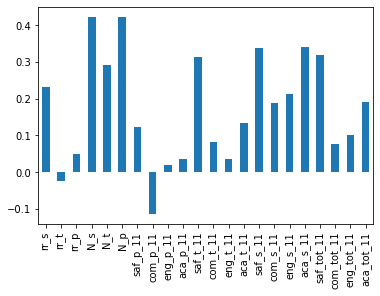

In [26]:
%matplotlib inline
combined.corr()['sat_score'][survey_fields].plot.bar()

Shows that how total enrollment impacts on SAT score
As I metioned and showed in bar graph, this scatter plot also shows that high enrollment has correaltion with sat_score

[Text(0.5, 1.0, 'Total Enrollment impacts on SAT score')]

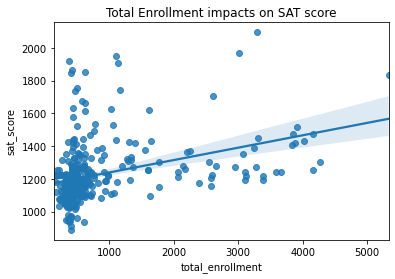

In [27]:
import matplotlib.pyplot as plt
graph = sns.regplot(x = 'total_enrollment', y = 'sat_score', data = combined )
graph.set(title = 'Total Enrollment impacts on SAT score')

Get schools name which are low enrollment and low scores on SAT

In [28]:
low_enrollment = combined[combined['total_enrollment'] < 1000]
low_enrollment = low_enrollment[low_enrollment['sat_score'] < 1000]
low_enrollment['School Name']

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

Graph the scatter plot that shows English Learner percentage in each school impacts on sat_score
Clearly shows that lot of English Learner percentage brings low score on SAT 

[Text(0.5, 1.0, 'English Learner percent in each school vs sat_ score')]

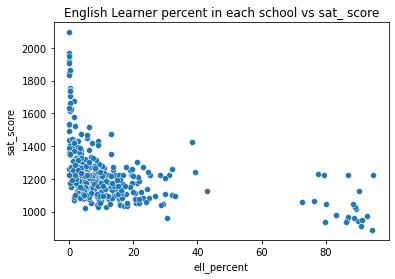

In [29]:
graph = sns.scatterplot(x = 'ell_percent', y = 'sat_score', data = combined)
graph.set( title = 'English Learner percent in each school vs sat_ score')

Group by school_dist and get mean value of each districts

In [30]:
import numpy as np
districts = combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace = True)
districts.head()

school_dist  SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0          01                       441.833333           473.333333   
1          02                       426.619092           444.186256   
2          03                       428.529851           437.997512   
3          04                       402.142857           416.285714   
4          05                       427.159915           438.236674   

   SAT Writing Avg. Score    sat_score  AP Test Takers   Total Exams Taken  \
0              439.333333  1354.500000       116.681090         173.019231   
1              424.832836  1295.638184       128.908454         201.516827   
2              426.915672  1293.443035       156.183494         244.522436   
3              405.714286  1224.142857       129.016484         183.879121   
4              419.666098  1285.062687        85.722527         115.725275   

   Number of Exams with scores 3 4 or 5  Total Cohort  \
0                            135.800000     93.500000   
1                            157.495833    158.647849   
2                            193.087500    183.384409   
3                            151.035714    113.857143   
4                            142.464286    143.677419   

   Total Grads - % of cohort  ...  priority08  priority09  priority10  \
0                  71.333333  ...         0.0         0.0         0.0   
1                  75.453574  ...         0.0         0.0         0.0   
2                  74.029937  ...         0.0         0.0         0.0   
3                  76.257143  ...         0.0         0.0         0.0   
4                  75.200881  ...         0.0         0.0         0.0   

   Community Board  Council District  Census Tract           BIN  \
0         3.000000          1.500000   1106.833333  1.004144e+06   
1         4.204005          2.963296   1132.479744  1.103862e+06   
2         7.500000          6.500000    166.666667  1.034931e+06   
3        11.000000          8.000000   2637.000000  1.055874e+06   
4         9.428571          8.142857   9372.571429  1.063080e+06   

            BBL        lat        lon  
0  1.003302e+09  40.719022 -73.982377  
1  1.070438e+09  40.739699 -73.991386  
2  1.012833e+09  40.781574 -73.977370  
3  1.016681e+09  40.793449 -73.943215  
4  1.019721e+09  40.817077 -73.949251  

[5 rows x 86 columns]

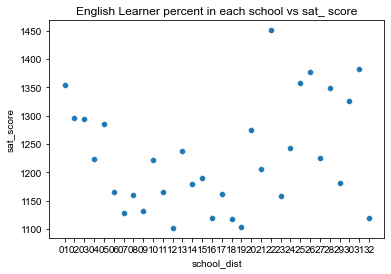

In [31]:
graph = sns.scatterplot(x = 'school_dist', y = 'sat_score', data = districts)
graph.set( title = 'English Learner percent in each school vs sat_ score')
sns.set(rc={'figure.figsize':(20,8.27)})

### Geographic Map with SAT score

In [32]:
import folium
import requests
from time import sleep

Now, I am interesting in NYC Geographical Map. folium package makes us to map if location is given. Moreover, I seperated school by SAT score. if SAT score is over 2000, then I marked as red color. 
Interesting fact is that overall 363 schools, yellow and green colored school are majority. Although NYC is the one of most sophisticated city, the education level is not high as much as expected. 

In [33]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in combined.index: 
    if combined['sat_score'][i] >= 2000 : 
        marker = folium.CircleMarker(location = [combined['lat'][i],combined['lon'][i]], radius = 7, color="red",tooltip = combined['SCHOOL NAME'][i])
        marker.add_to(folium_map)
    elif combined['sat_score'][i] >= 1800:
        marker = folium.CircleMarker(location = [combined['lat'][i],combined['lon'][i]], radius = 4, color="blue",tooltip = combined['SCHOOL NAME'][i])
        marker.add_to(folium_map)
    elif combined['sat_score'][i] >= 1500 : 
        marker = folium.CircleMarker(location = [combined['lat'][i],combined['lon'][i]], radius = 1, color="white",tooltip = combined['SCHOOL NAME'][i])
        marker.add_to(folium_map)
    elif combined['sat_score'][i] >= 1200 : 
        marker = folium.CircleMarker(location = [combined['lat'][i],combined['lon'][i]], radius = 1, color="green",tooltip = combined['SCHOOL NAME'][i])
        marker.add_to(folium_map)
    elif combined['sat_score'][i] >= 1000 : 
        marker = folium.CircleMarker(location = [combined['lat'][i],combined['lon'][i]], radius = 1, color="yellow",tooltip = combined['SCHOOL NAME'][i])
        marker.add_to(folium_map)
folium_map

### Race

Showing how race percentages are correlating with SAT score actually gives meaningful information. We are able to argue that higher percentage in White and Asian brings high SAT score. 

In [34]:
racial_col = ['white_per', 'asian_per', 'black_per' ,'hispanic_per']
combined.corr()['sat_score'][racial_col]

white_per       0.620718
asian_per       0.570730
black_per      -0.284139
hispanic_per   -0.396985
Name: sat_score, dtype: float64

Show school in map that has Asian Percentage is more than 40%. Here, We can realize that each races are tends to live together nearby.

In [47]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in combined.index: 
    if combined['asian_per'][i] >= 40 : 
        marker = folium.CircleMarker(location = [combined['lat'][i],combined['lon'][i]], radius = 1, color="blue",tooltip = combined['SCHOOL NAME'][i])
        marker.add_to(folium_map)
    elif combined['white_per'][i] >= 40 : 
        marker = folium.CircleMarker(location = [combined['lat'][i],combined['lon'][i]], radius = 1, color="red",tooltip = combined['SCHOOL NAME'][i])
        marker.add_to(folium_map)
    elif combined['black_per'][i] >= 40 : 
        marker = folium.CircleMarker(location = [combined['lat'][i],combined['lon'][i]], radius = 1, color="yellow",tooltip = combined['SCHOOL NAME'][i])
        marker.add_to(folium_map)
    elif combined['hispanic_per'][i] >= 40 : 
        marker = folium.CircleMarker(location = [combined['lat'][i],combined['lon'][i]], radius = 1, color="green",tooltip = combined['SCHOOL NAME'][i])
        marker.add_to(folium_map)
folium_map

Calculate the mean score of all NY schools

shows schools that strongs in sat_score AND high percentage in Asian

Mean value of SAT score in all NY school is 1223 and Only 5 schools come out to the result

In [36]:
#get mean of sat_score of all New York Schools
combined['sat_score'].mean() #1223
high_score_combined = combined[combined['sat_score'] > 1600]
high_score_high_asian_combined=high_score_combined[high_score_combined['asian_per']>50.0]
high_score_high_asian_combined[['SCHOOL NAME', 'sat_score', 'asian_per']]

SCHOOL NAME  sat_score  asian_per
37                              STUYVESANT HIGH SCHOOL     2096.0       72.1
151                       BRONX HIGH SCHOOL OF SCIENCE     1969.0       63.5
187                     BROOKLYN TECHNICAL HIGH SCHOOL     1833.0       60.3
302                        TOWNSEND HARRIS HIGH SCHOOL     1910.0       55.5
327  QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...     1868.0       74.4

Plot the how Race impacts on sat-score
According to the graph, high percentage in White and Asian brings high score in SAT. Meanwhile, high percentage in Hispanic and Black tends to bring low sat score. 

Text(0, 0.5, 'SAT score')

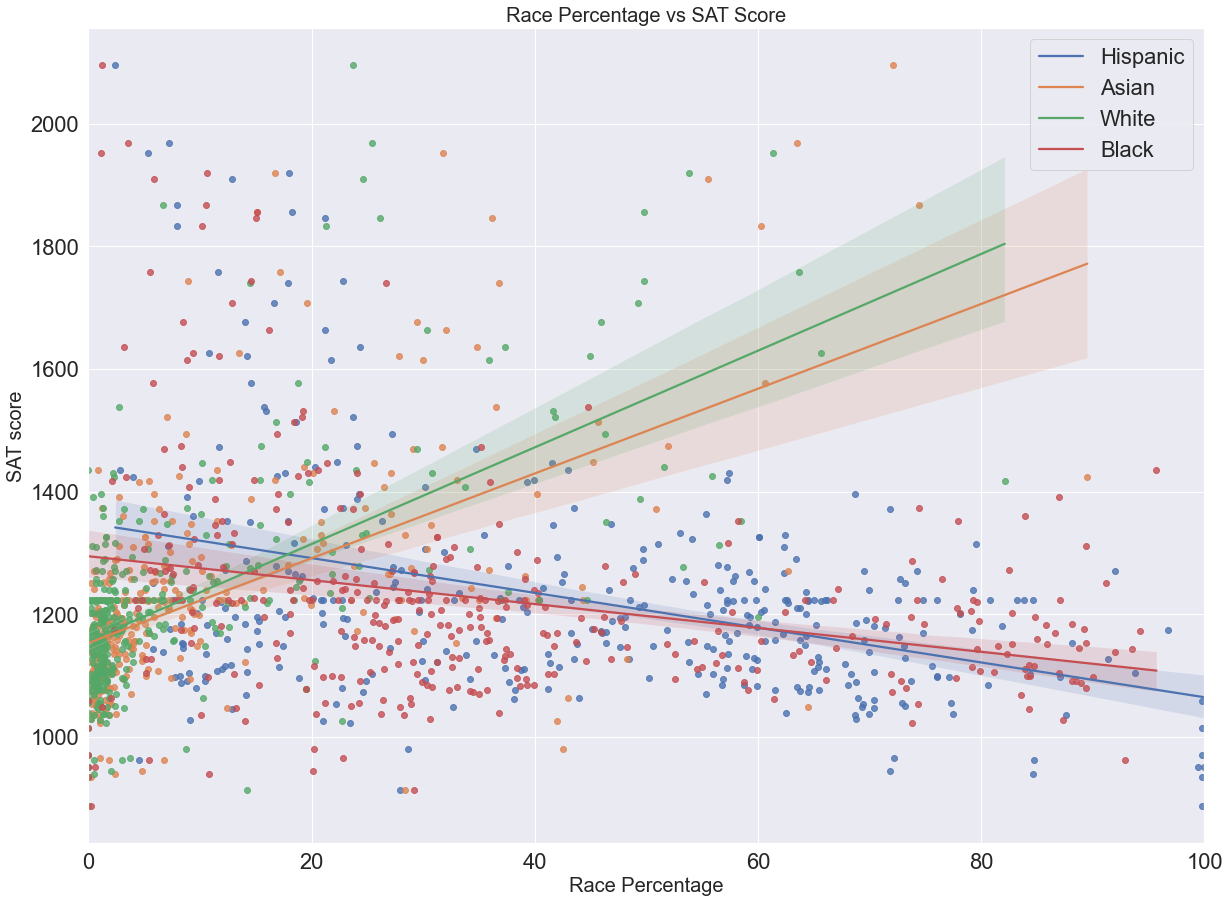

In [37]:
import seaborn as sns
sns.set(font_scale = 2)
plt.figure(figsize = (20,15))
plt.title('Race Percentage vs SAT Score',fontsize = 20)
ax1 = sns.regplot(x='hispanic_per',y='sat_score',data=combined, label = 'his') 
ax2 = sns.regplot(x='asian_per',y='sat_score',data=combined) 
ax3 = sns.regplot(x = 'white_per', y = 'sat_score', data = combined)
ax4 = sns.regplot(x = 'black_per', y = 'sat_score', data = combined)
plt.legend(labels=['Hispanic', 'Asian', 'White','Black'])
plt.xlabel('Race Percentage',fontsize = 20)
plt.ylabel('SAT score', fontsize = 20)

List and map of schools that consist of over 95% of hispanic

In [38]:
high_his_combined=combined[combined['hispanic_per']>95.0]

high_his_combined[['SCHOOL NAME', 'sat_score', 'hispanic_per']]




SCHOOL NAME  sat_score  \
44                       MANHATTAN BRIDGES HIGH SCHOOL     1058.0   
82    WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL     1174.0   
89   GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...     1014.0   
125                ACADEMY FOR LANGUAGE AND TECHNOLOGY      951.0   
141              INTERNATIONAL SCHOOL FOR LIBERAL ARTS      934.0   
176   PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE      970.0   
253                          MULTICULTURAL HIGH SCHOOL      887.0   
286             PAN AMERICAN INTERNATIONAL HIGH SCHOOL      951.0   

     hispanic_per  
44           99.8  
82           96.7  
89           99.8  
125          99.4  
141          99.8  
176          99.8  
253          99.8  
286         100.0

In [39]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in combined.index: 
    if combined['hispanic_per'][i] >= 95 : 
        marker = folium.CircleMarker(location = [combined['lat'][i],combined['lon'][i]], radius = 5, color="blue",tooltip = combined['SCHOOL NAME'][i])
        marker.add_to(folium_map)
folium_map

List of Schools that has high score in SAT
- result is interesting. schools are focused on science and technology fields have higher sat score
- Summation of Percentage of Asian and White are higher than 60

In [50]:
high_score_sch = combined[combined['sat_score'] > 1800]
high_score_sch[['SCHOOL NAME', 'sat_score', 'hispanic_per','black_per','asian_per','white_per']]

SCHOOL NAME  sat_score  \
5                       BARD HIGH SCHOOL EARLY COLLEGE     1856.0   
37                              STUYVESANT HIGH SCHOOL     2096.0   
79   HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...     1847.0   
151                       BRONX HIGH SCHOOL OF SCIENCE     1969.0   
155  HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE     1920.0   
187                     BROOKLYN TECHNICAL HIGH SCHOOL     1833.0   
302                        TOWNSEND HARRIS HIGH SCHOOL     1910.0   
327  QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...     1868.0   
356                STATEN ISLAND TECHNICAL HIGH SCHOOL     1953.0   

     hispanic_per  black_per  asian_per  white_per  
5            18.2       15.1       15.1       49.8  
37            2.4        1.2       72.1       23.7  
79           21.2       15.0       36.2       26.1  
151           7.2        3.5       63.5       25.4  
155          18.0       10.6       16.7       53.8  
187           7.9       10.2       60.3       21.3  
302          12.9        5.9       55.5       24.6  
327           7.9       10.5       74.4        6.7  
356           5.3        1.1       31.8       61.3

### AP - SAT

Now, I am wondering how AP test relates to SAT-score
Although many people think that if ap_per is high, then sat_score would be high as well 
However, it does not have strong correlations between AP and SAT
I made a ap_percentage columns to see correlationship between sat_score

In [43]:
    combined['ap_per'] = (combined['AP Test Takers '] / combined['total_enrollment'])*100
    combined

DBN                                        SCHOOL NAME  \
0    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1    01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2    01M450                         EAST SIDE COMMUNITY SCHOOL   
3    01M509                            MARTA VALLE HIGH SCHOOL   
4    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
..      ...                                                ...   
358  32K545        EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK   
359  32K549                 BUSHWICK SCHOOL FOR SOCIAL JUSTICE   
360  32K552                          ACADEMY OF URBAN PLANNING   
361  32K554               ALL CITY LEADERSHIP SECONDARY SCHOOL   
362  32K556  BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...   

    Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                       29                            355.0   
1                       91                            383.0   
2                       70                            377.0   
3                       44                            390.0   
4                      159                            522.0   
..                     ...                              ...   
358                     88                            384.0   
359                     75                            348.0   
360                     67                            342.0   
361                     39                            428.0   
362                     23                            347.0   

     SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                  404.0                   363.0     1122.0   
1                  423.0                   366.0     1172.0   
2                  402.0                   370.0     1149.0   
3                  433.0                   384.0     1207.0   
4                  574.0                   525.0     1621.0   
..                   ...                     ...        ...   
358                409.0                   361.0     1154.0   
359                353.0                   334.0     1035.0   
360                364.0                   354.0     1060.0   
361                465.0                   422.0     1315.0   
362                358.0                   350.0     1055.0   

                                            SchoolName  AP Test Takers   \
0                                                    0       129.028846   
1                         UNIVERSITY NEIGHBORHOOD H.S.        39.000000   
2                               EAST SIDE COMMUNITY HS        19.000000   
3                                                    0       129.028846   
4                       NEW EXPLORATIONS SCI,TECH,MATH       255.000000   
..                                                 ...              ...   
358                      EBC-HS FOR PUB SERVICE (BUSH)        47.000000   
359                                                  0       129.028846   
360                          Academy of Urban Planning        76.000000   
361               All City Leadership Secondary School         7.000000   
362  Bushwick Leaders High School for Academic Exce...        34.000000   

     Total Exams Taken  ...  Community Board Council District Census Tract  \
0           197.038462  ...              3.0              1.0        201.0   
1            49.000000  ...              3.0              1.0        202.0   
2            21.000000  ...              3.0              2.0         34.0   
3           197.038462  ...              3.0              1.0       3001.0   
4           377.000000  ...              3.0              2.0       2201.0   
..                 ...  ...              ...              ...          ...   
358          64.000000  ...              4.0             34.0        393.0   
359         197.038462  ...              4.0             37.0        435.0   
360         100.000000  ...              4.0             37.0        435.0   
361           8.0000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'ap_per vs sat_score'}, xlabel='ap_per', ylabel='sat_score'>

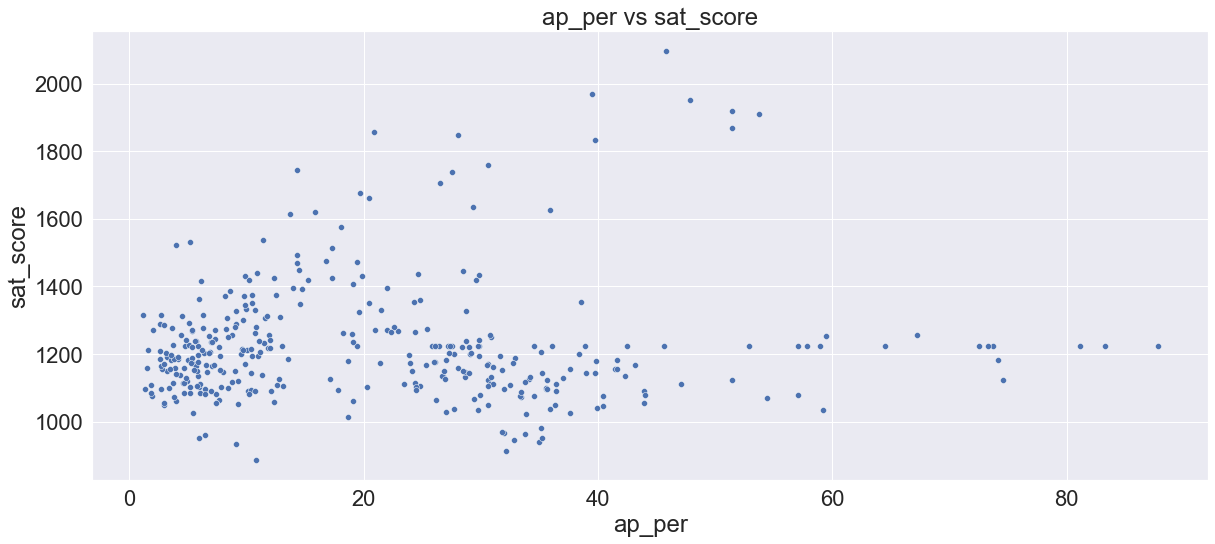

In [44]:
combined.plot.scatter(x = 'ap_per', y = 'sat_score', title = 'ap_per vs sat_score')

sns.scatterplot(x = 'ap_per', y = 'sat_score',data = combined)

## Result

- We have 363 Schools

- Strong Correlation with SAT Score

    - Advanced Regents - % of cohort     0.771566
    
    - Advanced Regents - % of grads      0.739927
    
    - Total Regents - % of cohort        0.667603
    
    - white_per                          0.620718


- Safety and Total Enrollment are the key to have higher SAT Score

- According to Analysis with the Geographical Map in NYC, the education level is not high as much as expected compare to the reputation of NYC

- schools are focused on science and technology fields have higher sat score. Moreover, Percentage of Asian and White in those schools are higher than 60%

- We cannot say that AP and SAT score does not have enough correlationship. 